In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle

%matplotlib inline

In [2]:
from sidm_orbit_calculation.src.utils.constants import *
from sidm_orbit_calculation.src.plotting.make_plots import *

In [3]:
dpi=175
fontsize=9
pylab.rc('savefig', dpi=dpi)
pylab.rc('text', usetex=True)
pylab.rc('font', size=fontsize)
pylab.rc('xtick.major', pad=5)
pylab.rc('xtick.minor', pad=5)
pylab.rc('ytick.major', pad=5)
pylab.rc('ytick.minor', pad=5)

In [4]:
class Data:
    def __init__(self,fname):
        self.fname = fname
        self.times,self.positions,self.momenta,self.gravity,self.drag,self.density,self.host = self.read_data()
        # self.x0, self.y0, self.px0, self.py0 = self.initial_conditions()

    def read_data(self):
        fi = open(self.fname,'rb')
        data = cPickle.load(fi)
        fi.close()
        return data

    def initial_conditions(self):
        self.x0 = self.positions[0,0]
        self.y0 = self.positions[0,1]
        self.px0 = self.momenta[0,0]
        self.py0 = self.momenta[0,1]
        
    def compute_values(self):
        self.x = self.positions[:,0]
        self.y = self.positions[:,1]
        self.r = np.sqrt(self.x**2+self.y**2)
        self.phi = np.arctan2(self.y,self.x)
        self.px = self.momenta[:,0]
        self.py = self.momenta[:,1]
        self.momentum = np.sqrt(self.px**2+self.py**2)

In [11]:
data_path = '/Users/nora/sidm_orbit_calculation/src/data/'

In [271]:
data = Data(data_path + 'pickle.dat')
data.initial_conditions()
print 'Initial position = (%.3g, %.3g) m' %(data.x0, data.y0)
print 'Initial velocity = (%.3g, %.3g) m/s' %(data.px0, data.py0)
data.compute_values()

Initial position = (1e+22, 0) m
Initial velocity = (0, 0) m/s


In [265]:
data2 = Data(data_path + 'nodrag.dat')
data2.initial_conditions()
data2.compute_values()

# data to plot
nn2 = len(data2.times)
tt2 = data2.times[0:80000:nn2/500]
xx2 = data2.x[0:80000:nn2/500]/data2.host.R_200
yy2 = data2.y[0:80000:nn2/500]/data2.host.R_200
vv2 = data2.px[0:80000:nn2/500]

In [272]:
# data to plot
nn = len(data.times)
tt = data.times[0:80000:nn/500]
xx = data.x[0:80000:nn/500]/data.host.R_200
yy = data.y[0:80000:nn/500]/data.host.R_200
vv = data.px[0:80000:nn/500]

In [273]:
G = 6.67e-11
M = 1e13*2e30
x0 = 1e22
v_a = lambda x: np.sqrt(2*G*M*(1/x-1/x0))

In [274]:
def check_velocity():
    vv_a = v_a(xx*data.host.R_200)

    print 'analytical: (%.5g, %.3g)' %(vv_a.min(),vv_a.max())
    print 'numerical: (%.5g, %.3g)' %(np.abs(vv).min(),np.abs(vv).max())
    
    print 'no drag: (%.5g, %.3g)' %(np.abs(vv2).min(),np.abs(vv2).max())
    
    pylab.figure(figsize=(3,3))
    pylab.plot(tt,-vv/1e3,'g-',markersize=10,linewidth=2,label='numerical')
    pylab.plot(tt2,-vv2/1e3,'r-',markersize=10,linewidth=2,label='no drag')
    pylab.plot(tt,vv_a/1e3,'c--',markersize=10,linewidth=2,label='analytical')
    pylab.xlabel(r'$\mathrm{time\ (seconds)}$')
    pylab.ylabel(r'$\mathrm{velocity\ (km/s)}$')
    pylab.xscale('log')
    pylab.yscale('log')
    pylab.legend(fontsize=8,loc='lower right') # fix formatting
    pylab.show()

analytical: (0, 2.13e+05)
numerical: (0, 6.86e+04)
no drag: (0, 5.02e+05)


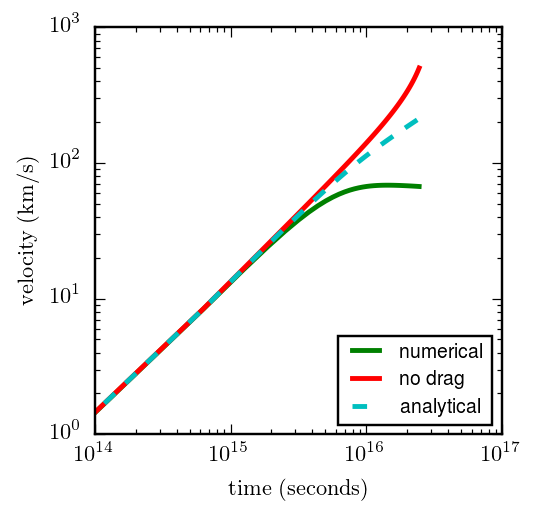

In [275]:
check_velocity()

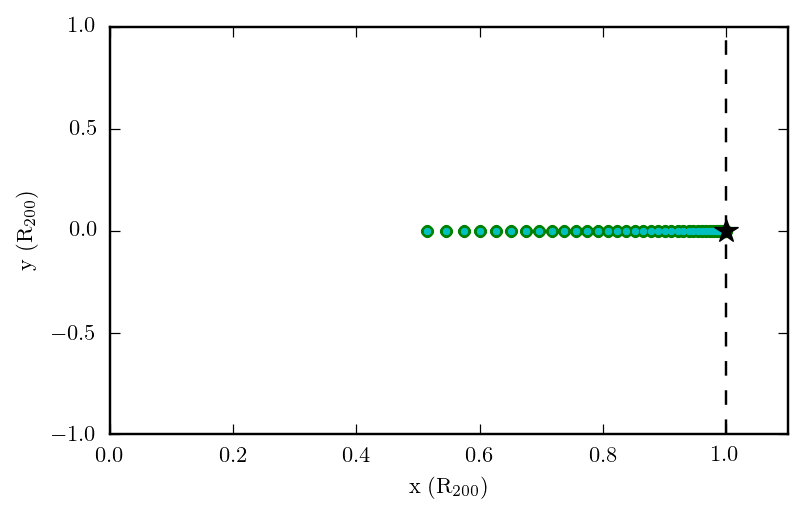

In [270]:
pylab.figure(figsize=(5,3))
pylab.plot(xx,yy,'g.',markersize=10,linewidth=2)
pylab.plot(xx2,yy2,'c.',markersize=5,linewidth=2)
pylab.plot(data.x0/data.host.R_200,data.y0/data.host.R_200,'k*',markersize=10)
pylab.plot([1,1],[y1.min()-1,y1.max()+1],'k--')
pylab.xlabel(r'$\mathrm{x\ (R_{200})}$')
pylab.ylabel(r'$\mathrm{y\ (R_{200})}$')
pylab.xlim([0*1e22/data.host.R_200,1.1*1e22/data.host.R_200])
pylab.ylim([-1e22/data.host.R_200,1e22/data.host.R_200])
pylab.show()

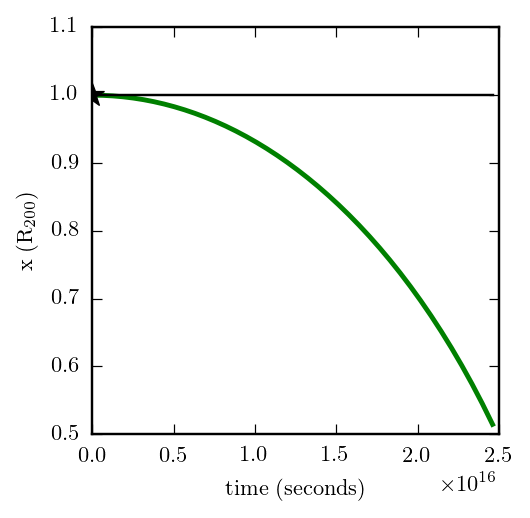

In [209]:
pylab.figure(figsize=(3,3))
pylab.plot(tt,xx,'g-',markersize=10,linewidth=2)
pylab.plot(0,data.x0/data.host.R_200,'k*',markersize=10)
pylab.plot([tt.min(),tt.max()],[1,1],'k-')
pylab.xlabel(r'$\mathrm{time\ (seconds)}$')
pylab.ylabel(r'$\mathrm{x\ (R_{200})}$')
# pylab.xscale('log')
# pylab.xlim([-1e16,None])
# pylab.ylim([-10,None])
pylab.show()

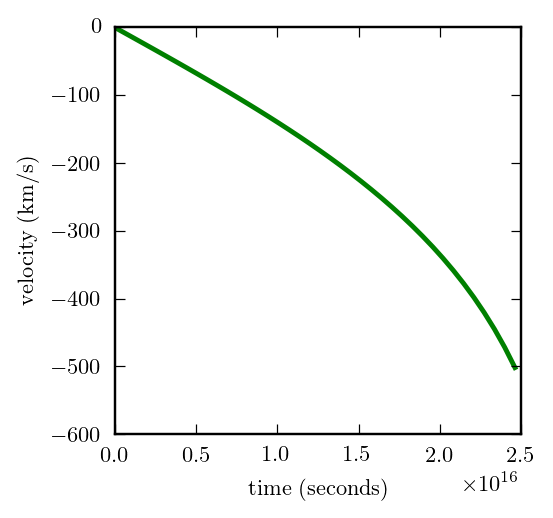

In [210]:
pylab.figure(figsize=(3,3))
pylab.plot(tt,vv/1e3,'g-',markersize=10,linewidth=2)
pylab.xlabel(r'$\mathrm{time\ (seconds)}$')
pylab.ylabel(r'$\mathrm{velocity\ (km/s)}$')
pylab.show()

In [254]:
def drag_force():
    fig = plt.figure(figsize=(3,3))
    ax = plt.subplot(111)

    drag_magnitude = np.sqrt(data.drag[:,0]**2+data.drag[:,1]**2)
    ax.plot(xx,drag_magnitude[0:80000:nn/500], 'c', linewidth=2)
    # ax.plot(data.r[:-1]/data.host.R_200,drag_magnitude, 'c', linewidth=2)

    plt.xlabel(r'$\mathrm{Radius\ (r/R_{200})}$')
    plt.ylabel(r'$\mathrm{Effective\ Drag\ Force\ (m/s^2)}$')
    # plt.xscale('log')
    plt.yscale('log')
    
    fig = plt.figure(figsize=(3,3))
    ax = plt.subplot(111)

    ax.plot(-vv*m_to_kpc/seconds_to_years,drag_magnitude[0:80000:nn/500], 'c', linewidth=2)

    plt.xlabel(r'$\mathrm{Particle\ Velocity\ (kpc/yr)}$')
    plt.ylabel(r'$\mathrm{Effective\ Drag\ Force\ (m/s^2)}$')
    plt.xscale('log')
    plt.yscale('log')

    plt.show()

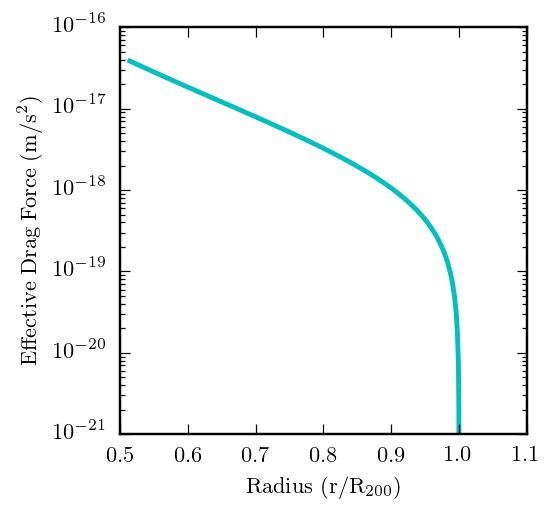

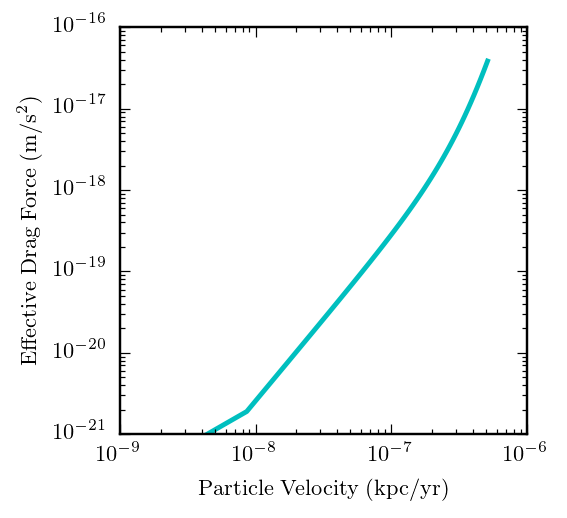

In [255]:
drag_force()

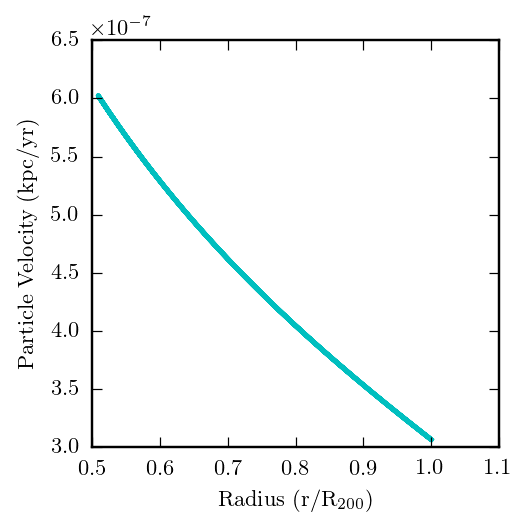

In [9]:
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)

ax.plot(data.r[:-1]/data.host.R_200,data.momentum[:-1]*m_to_kpc/seconds_to_years, 'c', linewidth=2)

plt.xlabel(r'$\mathrm{Radius\ (r/R_{200})}$')
plt.ylabel(r'$\mathrm{Particle\ Velocity\ (kpc/yr)}$')
# plt.xscale('log')
# plt.yscale('log')

plt.show()